Installing Necessary Packages

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.8 MB/s eta 0:00:00


In [2]:
!pip install opencv-python ultralytics moviepy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Detection on Imgaes

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/human.jpg: 448x640 1 Speed Breaker, 1 Person, 72.9ms
Speed: 15.0ms preprocess, 72.9ms inference, 37.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/pothole.jpg: 384x640 1 Pothole, 43.1ms
Speed: 5.5ms preprocess, 43.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/road_crossing_animal.jpg: 448x640 1 Animal, 10.3ms
Speed: 4.2ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/speed_breaker.jpg: 640x640 1 Speed Breaker, 8.5ms
Speed: 6.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


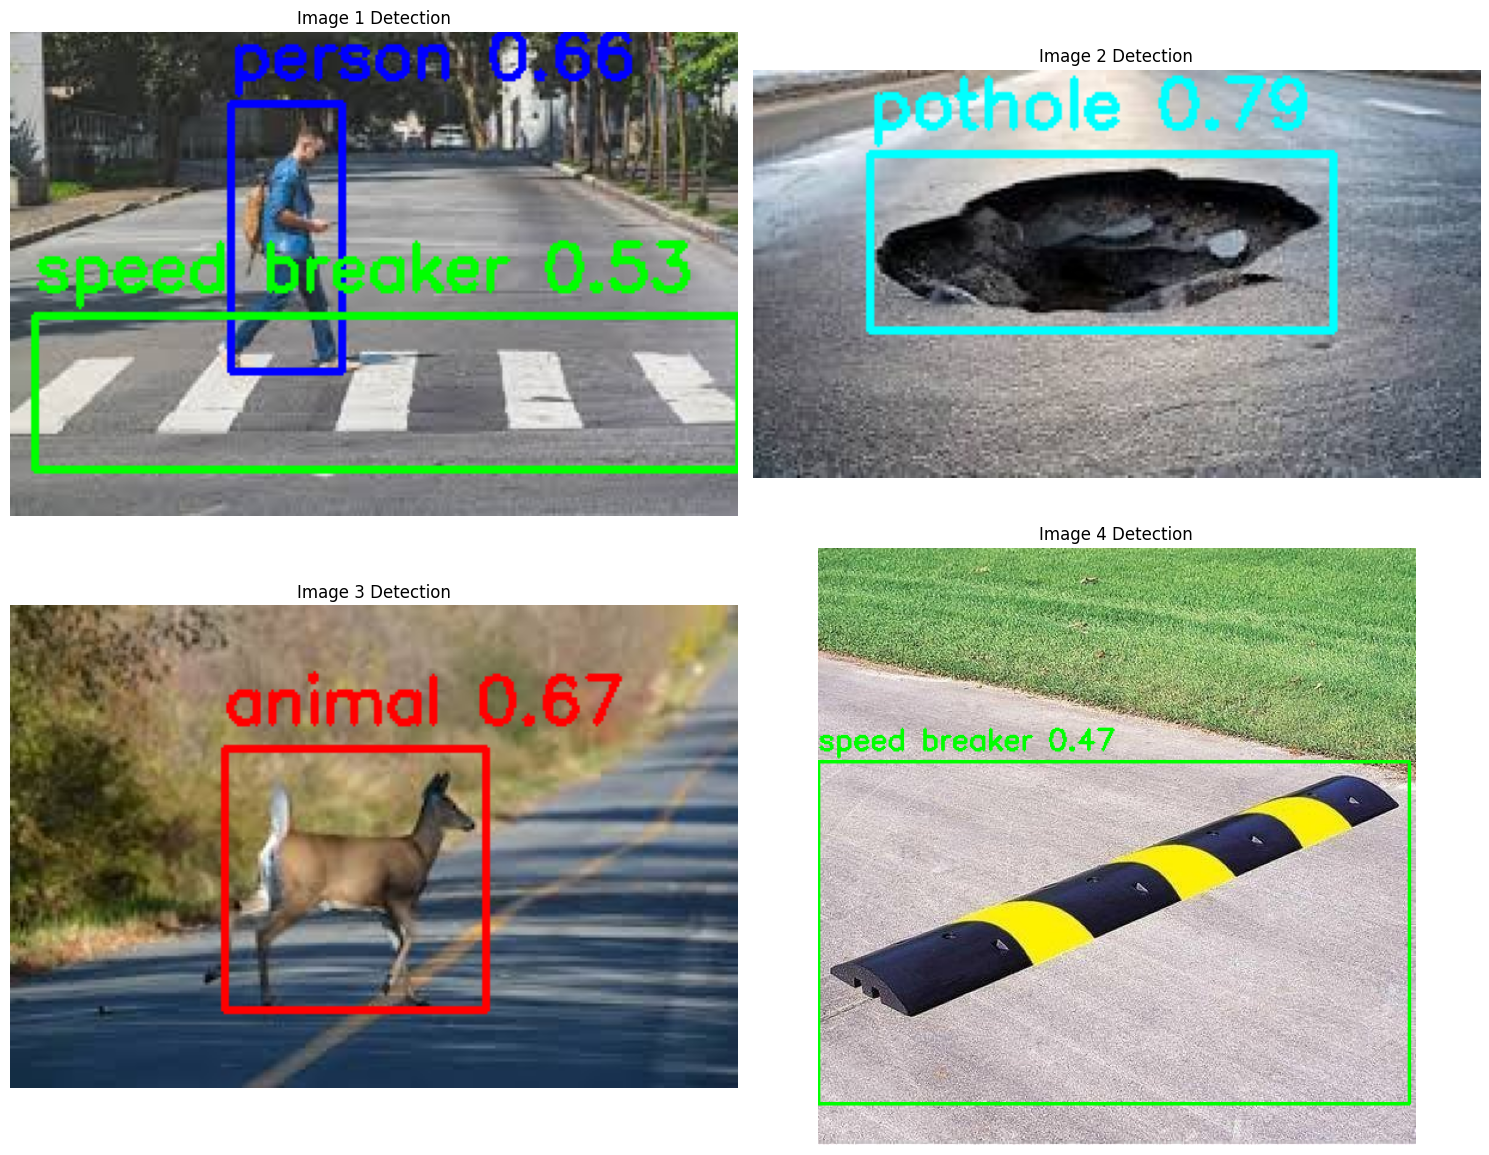

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# ✅ Load YOLOv8 model
model_path = "/content/drive/MyDrive/Yolo_Checkpoints/yolov8_training/weights/best.pt"
model = YOLO(model_path)

# ✅ Class-to-color mapping (customize as needed)
class_colors = {
    'pothole': (255, 255, 0),       # Yellow (in BGR)
    'speed breaker': (0, 255, 0),   # Green
    'person': (255, 0, 0),          # Blue
    'animal': (0, 0, 255),          # Red
}

# ✅ List of 4 image paths
image_paths = [
    "/content/human.jpg",
    "/content/pothole.jpg",
    "/content/road_crossing_animal.jpg",
    "/content/speed_breaker.jpg"
]

rendered_images = []

for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Could not load image from {path}. Skipping this image.")
        continue

    results = model(path)[0]  # Get first result object


    for box in results.boxes:
        cls_id = int(box.cls[0])
        class_name = results.names[cls_id].lower()
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Pick color for this class or default to white
        color = class_colors.get(class_name, (255, 255, 255))

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        label = f"{class_name} {conf:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rendered_images.append(img_rgb)

# ✅ Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for i, ax in enumerate(axs.flatten()):
    if i < len(rendered_images):
        ax.imshow(rendered_images[i])
        ax.set_title(f"Image {i+1} Detection")
        ax.axis('off')
    else:
        # Handle cases where not all 4 images were rendered
        ax.set_visible(False)

plt.tight_layout()
plt.show()

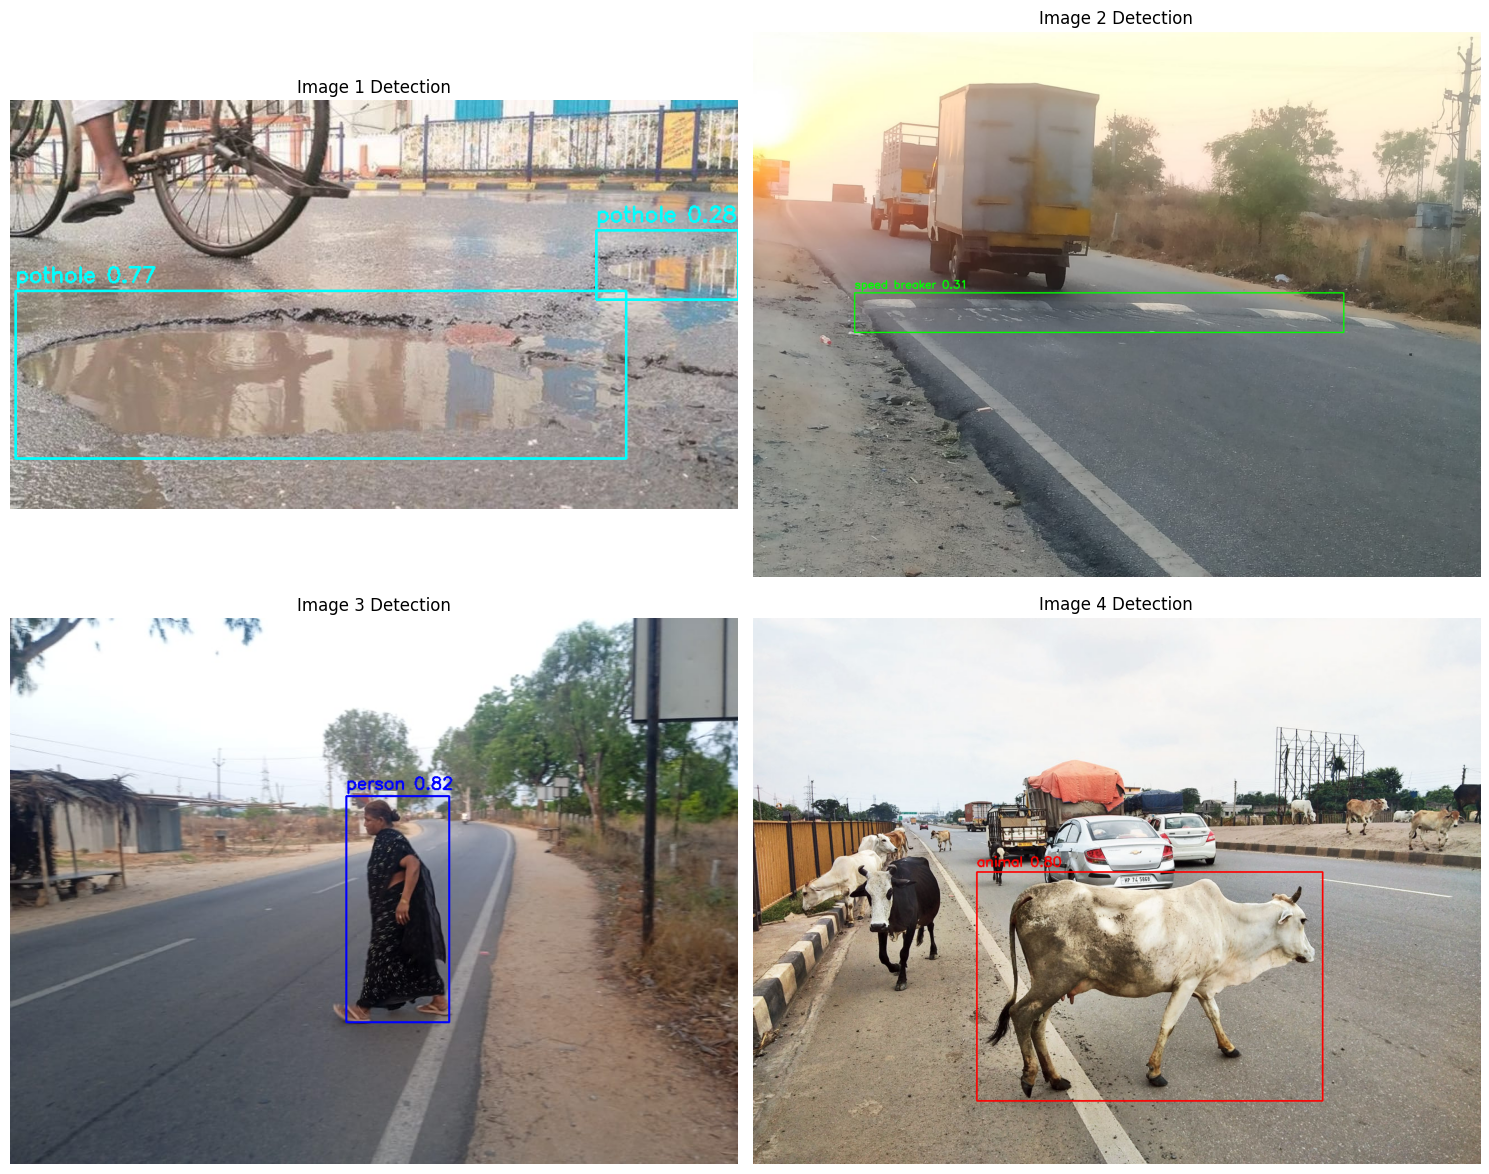

Frame by frame processing and detection

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# ✅ Load YOLOv8 model
model_path = "/content/drive/MyDrive/Yolo_Checkpoints/yolov8_training/weights/best.pt"
model = YOLO(model_path)

# ✅ Class-to-color mapping
class_colors = {
    'pothole': (255, 255, 0),       # Yellow (BGR)
    'speed breaker': (0, 255, 0),   # Green
    'person': (255, 0, 0),          # Blue
    'animal': (0, 0, 255),          # Red
}

# ✅ Video path
video_path = "/content/input_video.mp4"  # Update this
cap = cv2.VideoCapture(video_path)

frame_count = 0  # Start counting frames

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for box in results.boxes:
        cls_id = int(box.cls[0])
        class_name = results.names[cls_id].lower()
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Pick color for this class
        color = class_colors.get(class_name, (255, 255, 255))

        # Draw bbox and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        label = f"{class_name} {conf:.2f}"
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # ✅ Show each frame
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_count+1} Detection")
    plt.axis('off')
    plt.show()

    frame_count += 1

cap.release()

Output hidden; open in https://colab.research.google.com to view.

Detection on Videos

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import moviepy.editor as mp
import wave
import struct
import os

# ✅ Load YOLOv8 model
model = YOLO("/content/drive/MyDrive/Yolo_Checkpoints/yolov8_training/weights/best.pt")

# ✅ Class-to-color mapping (BGR format)
class_colors = {
    'pothole': (255, 255, 0),       # Yellow
    'speed breaker': (0, 255, 0),   # Green
    'person': (255, 0, 0),          # Blue
    'animal': (0, 0, 255),          # Red
}

# ✅ Input and output paths
input_path = "/content/input_video.mp4"
intermediate_output = "/content/video_with_boxes3.mp4"
final_output = "/content/final_video_with_sound3.mp4"

# ✅ Read input video
cap = cv2.VideoCapture(input_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# ✅ Prepare writer for annotated video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(intermediate_output, fourcc, fps, (width, height))

# ✅ To store detection timestamps
beep_times = []
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]
    detected = False

    for box in results.boxes:
        cls_id = int(box.cls[0])
        class_name = results.names[cls_id].lower()
        color = class_colors.get(class_name, (255, 255, 255))
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Draw box and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        label = f"{class_name} {conf:.2f}"
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        detected = True

    if detected:
        time_sec = round(frame_idx / fps, 2)
        beep_times.append(time_sec)

    out.write(frame)
    frame_idx += 1

cap.release()
out.release()
print("✅ Step 1 complete: Video with bounding boxes saved.")

In [ ]:
# ✅ Generate a beep.wav file
def create_beep(filename="beep.wav3", freq=1000, duration=0.2, volume=0.5):
    framerate = 44100
    n_samples = int(framerate * duration)
    amplitude = int(volume * 32767)
    wav_file = wave.open(filename, 'w')
    wav_file.setparams((1, 2, framerate, n_samples, 'NONE', 'not compressed'))

    for i in range(n_samples):
        value = int(amplitude * np.sin(2 * np.pi * freq * i / framerate))
        wav_file.writeframes(struct.pack('<h', value))

    wav_file.close()

# ✅ Generate the beep file
beep_path = "/content/beep.wav3"
create_beep(beep_path)

# ✅ Load video and beep
video = mp.VideoFileClip(intermediate_output)
beep = mp.AudioFileClip(beep_path)

# ✅ Create beep overlays at detection times
beep_clips = [beep.set_start(t) for t in beep_times]

# ✅ Combine with original audio if exists
if video.audio:
    final_audio = mp.CompositeAudioClip([video.audio] + beep_clips)
else:
    final_audio = mp.CompositeAudioClip(beep_clips)

# ✅ Merge final video with beep audio
final_video = video.set_audio(final_audio)
final_video.write_videofile(final_output, codec='libx264', audio_codec='aac')

print("✅ Final video created with beep alerts at detections!")

To Download the Output Video

In [ ]:
from google.colab import files
files.download('/content/final_video_with_sound3.mp4')

Gradio Interface

In [ ]:
!pip install gradio

In [ ]:
import cv2
import numpy as np
import gradio as gr
from ultralytics import YOLO
import moviepy.editor as mp
import wave
import struct
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager as fm

# ✅ Load YOLOv8 model
model = YOLO("/content/drive/MyDrive/Yolo_CheckpointsNew1/yolov8_training2/weights/best.pt")

# ✅ Class color map
class_colors = {
    'pothole': (255, 255, 0),
    'speed breaker': (0, 255, 0),
    'person': (255, 0, 0),
    'animal': (0, 0, 255),
}

# ✅ Real-world object heights
real_heights = {
    'pothole': 0.2,
    'speed breaker': 0.2,
    'person': 1.7,
    'animal': 0.5,
}

# ✅ Camera parameters
sensor_width_mm = 6.4
focal_length_mm = 4
image_width_px = 1280
focal_length_px = (sensor_width_mm * image_width_px) / focal_length_mm

# ✅ Load font that supports emojis (works in Colab)
font_path = fm.findfont("DejaVu Sans")
font = ImageFont.truetype(font_path, 32)

# ✅ Beep sound generator
def create_beep(filename="/content/beep.wav", freq=1000, duration=0.2, volume=0.5):
    framerate = 44100
    n_samples = int(framerate * duration)
    amplitude = int(volume * 32767)
    wav_file = wave.open(filename, 'w')
    wav_file.setparams((1, 2, framerate, n_samples, 'NONE', 'not compressed'))

    for i in range(n_samples):
        value = int(amplitude * np.sin(2 * np.pi * freq * i / framerate))
        wav_file.writeframes(struct.pack('<h', value))

    wav_file.close()
    return filename

# ✅ Image detection
def detect_image(img):
    results = model(img)[0]
    alerts = []

    for box in results.boxes:
        cls_id = int(box.cls[0])
        class_name = results.names[cls_id].lower()
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        color = class_colors.get(class_name, (255, 255, 255))
        bbox_height = y2 - y1

        if class_name in real_heights and bbox_height > 0:
            H = real_heights[class_name]
            distance = (H * focal_length_px) / bbox_height
            distance_label = f"{distance:.2f} m"
            alerts.append(f"⚠️ {class_name.title()} detected at {distance_label} ahead.")
        else:
            distance_label = "N/A"

        label = f"{class_name} {conf:.2f} | {distance_label}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # ✅ Overlay alert box using PIL
    pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_img)
    alert_text = alerts[0] if alerts else "✅ No hazard detected."
    draw.rectangle([(10, 10), (pil_img.width - 10, 60)], fill="white")
    draw.text((20, 15), alert_text, font=font, fill="red")

    return np.array(pil_img)

# ✅ Video detection
def detect_video(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    intermediate_output = "/content/intermediate.mp4"
    final_output = "/content/final_output.mp4"
    out = cv2.VideoWriter(intermediate_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    beep_times = []
    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)[0]
        alerts = []

        for box in results.boxes:
            cls_id = int(box.cls[0])
            class_name = results.names[cls_id].lower()
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            color = class_colors.get(class_name, (255, 255, 255))
            bbox_height = y2 - y1

            if class_name in real_heights and bbox_height > 0:
                H = real_heights[class_name]
                distance = (H * focal_length_px) / bbox_height
                distance_label = f"{distance:.2f} m"
                alerts.append(f"⚠️ {class_name.title()} detected at {distance_label} ahead.")
            else:
                distance_label = "N/A"

            label = f"{class_name} {conf:.2f} | {distance_label}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # ✅ Overlay alert using PIL
        alert_msg = alerts[0] if alerts else "✅ No hazard detected."
        frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        draw = ImageDraw.Draw(frame_pil)
        draw.rectangle([(10, 10), (width - 10, 60)], fill="white")
        draw.text((20, 15), alert_msg, font=font, fill="red")

        if alerts:
            beep_times.append(round(frame_idx / fps, 2))

        out.write(cv2.cvtColor(np.array(frame_pil), cv2.COLOR_RGB2BGR))
        frame_idx += 1

    cap.release()
    out.release()

    # ✅ Beep and audio
    beep_path = create_beep()
    video_clip = mp.VideoFileClip(intermediate_output)
    beep_clip = mp.AudioFileClip(beep_path)
    beep_clips = [beep_clip.set_start(t) for t in beep_times]

    final_audio = mp.CompositeAudioClip([video_clip.audio] + beep_clips) if video_clip.audio else mp.CompositeAudioClip(beep_clips)
    final_video = video_clip.set_audio(final_audio)
    final_video.write_videofile(final_output, codec='libx264', audio_codec='aac')

    return final_output

# ✅ Gradio Interfaces
image_interface = gr.Interface(
    fn=detect_image,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Image with Alert"),
    title="🚧 Road Hazard Detection - Image",
    theme=gr.themes.Default(primary_hue="blue")
)

video_interface = gr.Interface(
    fn=detect_video,
    inputs=gr.Video(label="Upload Video"),
    outputs=gr.Video(label="Processed Video with Alerts"),
    title="🚧 Road Hazard Detection - Video",
    theme=gr.themes.Default(primary_hue="blue")
)

# ✅ Combine interfaces with global blue theme
app = gr.TabbedInterface(
    interface_list=[image_interface, video_interface],
    tab_names=["Image Detection", "Video Detection"],
    theme=gr.themes.Default(primary_hue="blue")
)

# ✅ Launch
app.launch(debug=True)